# Stochastic processes

## Renewal process

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from relife.lifetime_model import Weibull
from relife.stochastic_process import RenewalProcess

In [2]:
distrib = Weibull(5, 0.03)
renewal_process = RenewalProcess(distrib)

In [3]:
rf_timeline, rf = renewal_process.renewal_function(150, nb_steps=5000)
print(rf_timeline.shape, rf.shape)

rd_timeline, rd = renewal_process.renewal_density(150, nb_steps=5000)
print(rd_timeline.shape, rd.shape)

(5000,) (5000,)
(5000,) (5000,)


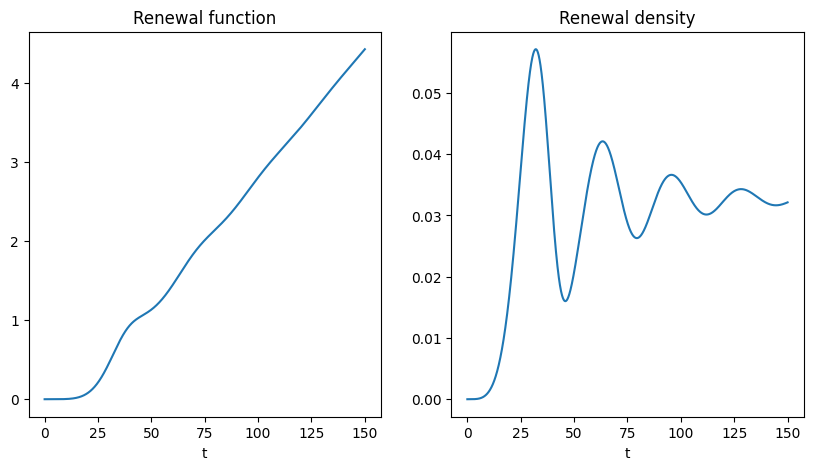

In [4]:
fig, ax = plt.subplots(ncols=2, nrows=1,  figsize=(10, 5))

ax[0].set_title("Renewal function")
ax[0].set_xlabel("t")
ax[0].plot(rf_timeline, rf)

ax[1].set_title("Renewal density")
ax[1].set_xlabel("t")
ax[1].plot(rd_timeline, rd)

plt.show()

In [5]:
tf = 150
nb_samples = 100

renewal_sample = renewal_process.sample(tf=150, size=100, seed=10)
print(renewal_sample.select(sample_id=0).sample_id)
print(renewal_sample.select(sample_id=0).timeline)
print(renewal_sample.select(sample_id=0).time)
print(renewal_sample.select(sample_id=0).event)

[0 0 0 0 0 0]
[ 17.92712688  56.41141111  91.97806868 114.64053356 138.42978847
 150.        ]
[17.92712688 38.48428423 35.56665757 22.66246487 23.78925492 11.57021153]
[ True  True  True  True  True False]


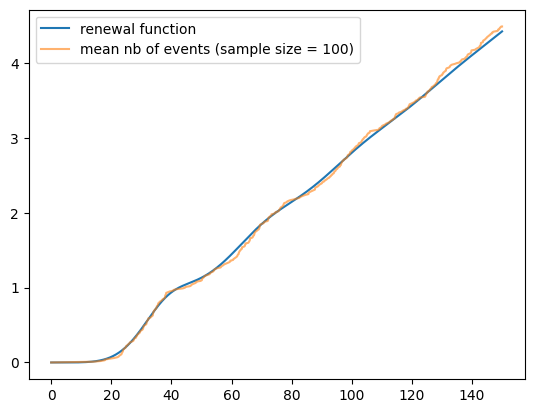

In [6]:
timeline, mean_nb_events = renewal_sample.mean_nb_events()
plt.plot(rf_timeline, rf, label="renewal function")
plt.plot(timeline, mean_nb_events, alpha=0.6, label="mean nb of events (sample size = 100)")
plt.legend()

Computation of equilibrium age distribution. Over a sufficiently long period of time, the varariance of life spans “spreads” failures over time, resulting in a stabilization of the rate of occurrence of failures over time. When this stationary regime is reached, the working population has an age distribution that no longer varies over time: this is the equilibrium age distribution.

In [7]:
from relife.lifetime_model import EquilibriumDistribution

eq_distrib = EquilibriumDistribution(distrib)

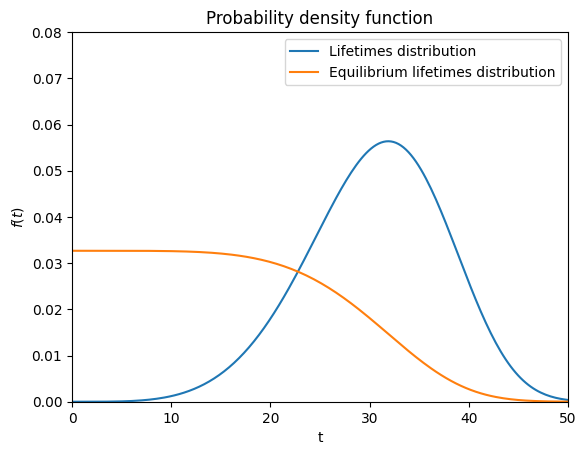

In [8]:
fig, ax = plt.subplots()
ax.set_ylim(top=0.08)
distrib.plot.pdf(ax=ax, end_time=50, label="Lifetimes distribution")
eq_distrib.plot.pdf(ax=ax, end_time=50, label="Equilibrium lifetimes distribution")
plt.show()

In [9]:
renewal_sample = renewal_process.sample(tf=150, size=5000, seed=21)
sample_age_eq = [renewal_sample.select(sample_id=i).time[-1] for i in range(1000)]
sample_age = [renewal_sample.select(sample_id=i).time[-2] for i in range(1000)]

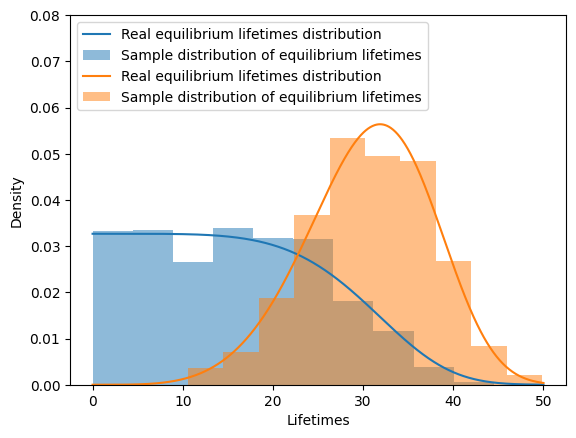

In [10]:
t = np.linspace(0, 50, num=1000)

fig, ax = plt.subplots()
ax.set_ylim(top=0.08)

ax.plot(t, eq_distrib.pdf(t), label="Real equilibrium lifetimes distribution")
ax.hist(sample_age_eq, density=True, alpha=0.5, color=ax.lines[-1].get_color(), label="Sample distribution of equilibrium lifetimes")

ax.plot(t, distrib.pdf(t), label="Real equilibrium lifetimes distribution")
ax.hist(sample_age, density=True, alpha=0.5, color=ax.lines[-1].get_color(), label="Sample distribution of equilibrium lifetimes")

ax.set_xlabel("Lifetimes")
ax.set_ylabel("Density")
ax.legend(loc="upper left")
plt.show()